# Electric dipole

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ArrowStyle
import scipy.constants as constants

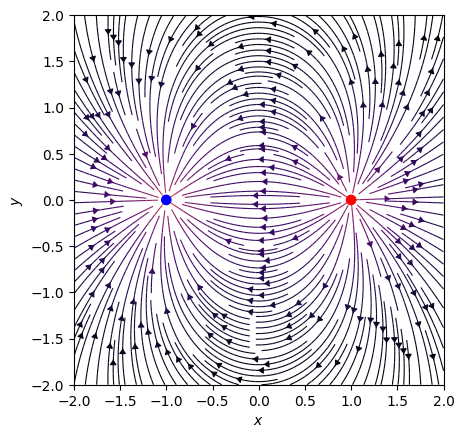

In [24]:
a = 1 # distance

def E(x, y):
    """Returns a vector E=(Ex,Ey) for the electric field at position (x,y).
    The respective derivative of the potential was calculated by hand.
    """
    q = constants.e
    multiplier = q / (4 * np.pi * constants.epsilon_0)
    cube_negative = ((x-a)**2 + y**2)**(3/2)
    cube_plus = ((x+a)**2 + y**2)**(3/2)
    x_component = ((x+a) / cube_plus) - ((x-a) / cube_negative)
    y_component = (y / cube_plus) - (y / cube_negative)
    return (x_component, y_component)

# Grid of points
nx, ny = 2**10, 2**10
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x,y)

# Calculate E field on every grid point
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
delX, delY = E(x=X, y=Y)
Ex += delX
Ey += delY


# Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

slope = np.hypot(Ex, Ey)
color = 3 * np.log(slope)
my_arrow_style = ArrowStyle("<|-", head_length=.3, head_width=.2)
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=0.8, cmap=plt.cm.inferno,
              density=2.2, arrowstyle=my_arrow_style, arrowsize=1, broken_streamlines=True)

charge_colors = ['red', 'blue']
for i, pos in enumerate([(a, 0), (-a, 0)]):
    ax.add_patch(Circle(pos, 0.05, color=charge_colors[i], zorder=2))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.savefig('01-dipol.pdf')